# Permutation Feature Importance

In [2]:
%matplotlib inline

In [3]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
import copy

Let's load in our ASOS station dataset.

In [4]:
input_data = pd.read_csv("../Week_5/al_asos_jul_23_v2.csv")

In [5]:
input_data

,station,valid,tmpf,tmpc,dwpf,dwpc,relh,feel,sknt,mslp,p01m,p01i,gust,skyc1,skyl1
0,HEY,2023-07-01 00:11,87.8,31.00,71.6,22.00,58.78,94.18,0.0,1013.0,0.0000,0.0000,NaN,CLR,NaN
1,SXS,2023-07-01 00:12,87.8,31.00,71.6,22.00,58.78,94.18,0.0,1013.6,0.0000,0.0000,NaN,CLR,NaN
2,HUA,2023-07-01 00:14,89.6,32.00,77.0,25.00,66.55,102.54,5.0,1013.9,0.0000,0.0000,NaN,FEW,4700.0
3,8A0,2023-07-01 00:15,86.0,30.00,73.4,23.00,66.15,93.45,0.0,NaN,0.0000,0.0000,NaN,CLR,NaN
4,4A6,2023-07-01 00:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64232,EKY,2023-07-30 23:56,79.0,26.11,76.0,24.44,90.55,79.00,0.0,1001.8,0.0000,0.0000,NaN,CLR,NaN
64233,79J,2023-07-30 23:56,76.0,24.44,73.0,22.78,90.44,76.00,4.0,1015.6,0.0000,0.0000,NaN,CLR,NaN
64234,SXS,2023-07-30 23:56,73.4,23.00,73.4,23.00,100.00,73.40,0.0,1015.1,0.0000,0.0000,NaN,FEW,500.0
64235,EUF,2023-07-30 23:58,79.0,26.11,75.0,23.89,87.58,79.00,0.0,1014.3,0.0000,0.0000,NaN,CLR,NaN


In [6]:
# It is often good practice to drop missing data, so let's do just that. 
input_data_nona = input_data.dropna()

In [7]:
input_data_nona

,station,valid,tmpf,tmpc,dwpf,dwpc,relh,feel,sknt,mslp,p01m,p01i,gust,skyc1,skyl1
290,HSV,2023-07-01 03:53,81.0,27.22,68.0,20.00,64.69,83.76,24.0,1017.4,0.0001,0.0001,36.0,FEW,900.0
299,DCU,2023-07-01 03:53,81.0,27.22,67.0,19.44,62.28,83.40,16.0,1017.5,0.0000,0.0000,31.0,FEW,4700.0
406,1M4,2023-07-01 04:56,79.0,26.11,75.0,23.89,87.58,79.00,11.0,1017.1,0.0000,0.0000,19.0,FEW,3000.0
1378,PRN,2023-07-01 16:58,91.0,32.78,73.0,22.78,55.72,99.57,5.0,1011.7,0.0000,0.0000,14.0,FEW,3700.0
1433,BHM,2023-07-01 17:53,96.0,35.56,73.0,22.78,47.57,106.07,12.0,1015.5,0.0000,0.0000,17.0,BKN,4800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64061,LOR,2023-07-30 22:27,78.8,26.00,71.6,22.00,78.62,78.80,8.0,1014.4,0.0000,0.0000,16.0,SCT,2100.0
64065,HEY,2023-07-30 22:32,80.6,27.00,71.6,22.00,74.11,84.57,6.0,1015.5,0.0000,0.0000,16.0,FEW,2000.0
64084,OZR,2023-07-30 22:37,77.0,25.00,71.6,22.00,83.44,77.00,9.0,1015.9,0.0000,0.0000,18.0,SCT,3000.0
64109,BFM,2023-07-30 22:53,80.0,26.67,73.0,22.78,79.25,84.13,5.0,1016.5,1.7800,0.0700,20.0,BKN,5000.0


583 rows!?! That's not enough. Remember to be careful as you're doing this...

In [8]:
input_data_nona = input_data.drop('gust', axis=1).dropna()

In [9]:
input_data_nona

,station,valid,tmpf,tmpc,dwpf,dwpc,relh,feel,sknt,mslp,p01m,p01i,skyc1,skyl1
2,HUA,2023-07-01 00:14,89.6,32.00,77.0,25.00,66.55,102.54,5.0,1013.9,0.0000,0.0000,FEW,4700.0
22,HUA,2023-07-01 00:25,89.6,32.00,77.0,25.00,66.55,102.54,5.0,1013.9,0.0000,0.0000,FEW,4700.0
46,BHM,2023-07-01 00:53,93.0,33.89,71.0,21.67,49.09,100.13,10.0,1014.2,0.0000,0.0000,FEW,15000.0
49,HSV,2023-07-01 00:53,89.0,31.67,78.0,25.56,70.12,103.36,3.0,1013.8,0.0000,0.0000,FEW,5500.0
72,HUA,2023-07-01 00:55,88.3,31.28,77.7,25.39,70.97,101.60,4.0,1013.9,0.0001,0.0001,BKN,4400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64217,SXS,2023-07-30 23:55,74.0,23.33,73.6,23.11,98.66,74.00,0.0,1014.7,0.2500,0.0100,FEW,700.0
64227,HEY,2023-07-30 23:55,77.5,25.28,75.0,23.89,92.02,77.50,0.0,1014.1,0.0001,0.0001,SCT,9500.0
64228,LOR,2023-07-30 23:55,75.4,24.11,73.2,22.89,92.89,75.40,3.0,1013.7,0.0001,0.0001,FEW,9000.0
64230,MOB,2023-07-30 23:56,82.0,27.78,72.0,22.22,71.78,86.83,14.0,1016.1,0.0001,0.0001,BKN,4100.0


See any issues here?

In [10]:
input_data_renamed_clouds = copy.deepcopy(input_data)
all_cloud_vals = input_data_renamed_clouds['skyc1']
all_cloud_vals.fillna('CLR')
input_data_renamed_clouds['skyc1'] = all_cloud_vals
input_data_renamed_clouds

,station,valid,tmpf,tmpc,dwpf,dwpc,relh,feel,sknt,mslp,p01m,p01i,gust,skyc1,skyl1
0,HEY,2023-07-01 00:11,87.8,31.00,71.6,22.00,58.78,94.18,0.0,1013.0,0.0000,0.0000,NaN,CLR,NaN
1,SXS,2023-07-01 00:12,87.8,31.00,71.6,22.00,58.78,94.18,0.0,1013.6,0.0000,0.0000,NaN,CLR,NaN
2,HUA,2023-07-01 00:14,89.6,32.00,77.0,25.00,66.55,102.54,5.0,1013.9,0.0000,0.0000,NaN,FEW,4700.0
3,8A0,2023-07-01 00:15,86.0,30.00,73.4,23.00,66.15,93.45,0.0,NaN,0.0000,0.0000,NaN,CLR,NaN
4,4A6,2023-07-01 00:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64232,EKY,2023-07-30 23:56,79.0,26.11,76.0,24.44,90.55,79.00,0.0,1001.8,0.0000,0.0000,NaN,CLR,NaN
64233,79J,2023-07-30 23:56,76.0,24.44,73.0,22.78,90.44,76.00,4.0,1015.6,0.0000,0.0000,NaN,CLR,NaN
64234,SXS,2023-07-30 23:56,73.4,23.00,73.4,23.00,100.00,73.40,0.0,1015.1,0.0000,0.0000,NaN,FEW,500.0
64235,EUF,2023-07-30 23:58,79.0,26.11,75.0,23.89,87.58,79.00,0.0,1014.3,0.0000,0.0000,NaN,CLR,NaN


In [11]:
input_data_nona = input_data_renamed_clouds.drop(['gust', 'skyl1', 'mslp'], axis=1).dropna()

In [12]:
input_data_nona

,station,valid,tmpf,tmpc,dwpf,dwpc,relh,feel,sknt,p01m,p01i,skyc1
0,HEY,2023-07-01 00:11,87.8,31.00,71.6,22.00,58.78,94.18,0.0,0.0000,0.0000,CLR
1,SXS,2023-07-01 00:12,87.8,31.00,71.6,22.00,58.78,94.18,0.0,0.0000,0.0000,CLR
2,HUA,2023-07-01 00:14,89.6,32.00,77.0,25.00,66.55,102.54,5.0,0.0000,0.0000,FEW
3,8A0,2023-07-01 00:15,86.0,30.00,73.4,23.00,66.15,93.45,0.0,0.0000,0.0000,CLR
5,JFX,2023-07-01 00:15,91.4,33.00,78.8,26.00,66.75,107.79,3.0,0.0000,0.0000,FEW
...,...,...,...,...,...,...,...,...,...,...,...,...
64232,EKY,2023-07-30 23:56,79.0,26.11,76.0,24.44,90.55,79.00,0.0,0.0000,0.0000,CLR
64233,79J,2023-07-30 23:56,76.0,24.44,73.0,22.78,90.44,76.00,4.0,0.0000,0.0000,CLR
64234,SXS,2023-07-30 23:56,73.4,23.00,73.4,23.00,100.00,73.40,0.0,0.0000,0.0000,FEW
64235,EUF,2023-07-30 23:58,79.0,26.11,75.0,23.89,87.58,79.00,0.0,0.0000,0.0000,CLR


Text(0, 0.5, 'Heat index (F)')

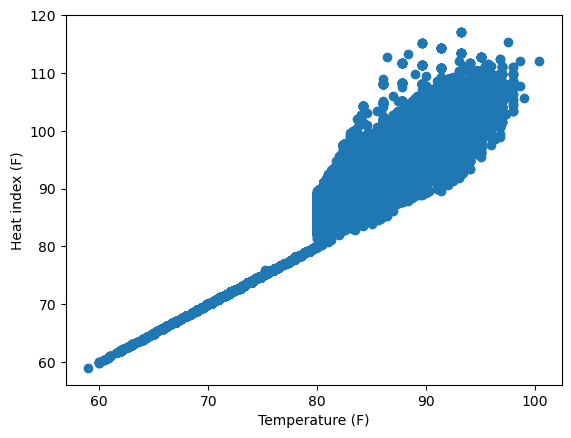

In [13]:
plt.scatter(input_data_nona['tmpf'], input_data_nona['feel'])
plt.xlabel("Temperature (F)")
plt.ylabel("Heat index (F)")

In [14]:
def nws_heat_index(T, RH):
    '''
    T in fahrenheit, RH in %
    https://www.wpc.ncep.noaa.gov/html/heatindex_equation.shtml
    '''
    initial_hi =  0.5 * (T + 61.0 + ((T-68.0)*1.2) + (RH*0.094))
    if initial_hi < 80:
        return initial_hi

    adjustment_factor = 0
    if T>=80 and T<=112 and RH <13:
        adjustment_factor =  ((13-RH)/4)*np.sqrt((17-np.abs(T-95.))/17)
    
    if T>=80 and T<=87 and RH > 85:
         adjustment_factor = ((RH-85)/10) * ((87-T)/5)

    return (-42.379 + 2.04901523*T + 10.14333127*RH - .22475541*T*RH - .00683783*T*T - 
           .05481717*RH*RH + .00122874*T*T*RH + .00085282*T*RH*RH - .00000199*T*T*RH*RH) + adjustment_factor

nws_heat_index_vectorized = np.vectorize(nws_heat_index)

In [15]:
our_calc_hi = nws_heat_index_vectorized(input_data_nona['tmpf'], input_data_nona['relh'])

Text(0, 0.5, 'IEM Reported Feels Like')

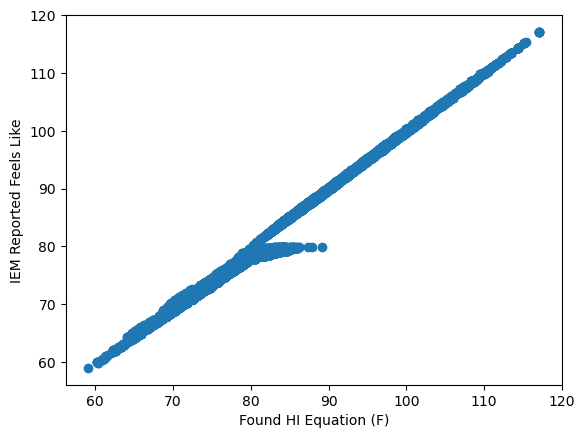

In [16]:
plt.scatter(our_calc_hi, input_data_nona['feel'])
plt.xlabel("Found HI Equation (F)")
plt.ylabel("IEM Reported Feels Like")

(80.0, 120.0)

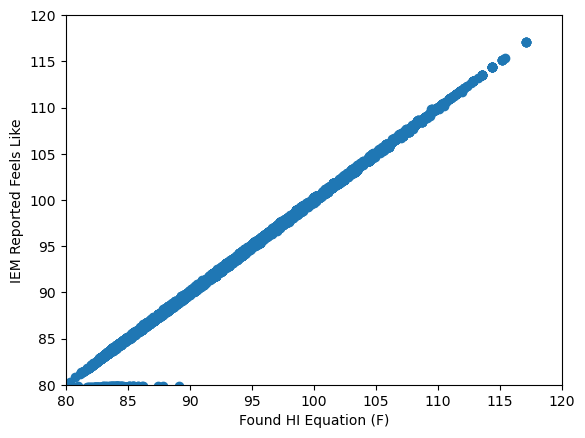

In [17]:
plt.scatter(our_calc_hi, input_data_nona['feel'])
plt.xlabel("Found HI Equation (F)")
plt.ylabel("IEM Reported Feels Like")
plt.xlim(80, 120)
plt.ylim(80, 120)

Let's try this with an ANN

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Prepare our data first
training_data, test_validation = train_test_split(input_data_nona, test_size=0.25)
testing_data, validation_data = train_test_split(test_validation, test_size=0.5)

In [20]:
training_data['tmpf'].values.shape

(45764,)

In [21]:
np.sum(pd.isna(training_data['tmpf'].values))

0

In [40]:
# Let's try adding different layers
input1 = keras.layers.Input(shape=(2, ))
input_norm = keras.layers.Normalization()(input1)


dense1 = keras.layers.Dense(128, input_dim=0, activation=None)(input_norm)
lerelu_layer = keras.layers.LeakyReLU(alpha=0.3)(dense1) 
dense2 = keras.layers.Dense(64, input_dim=0, activation=keras.activations.relu)(lerelu_layer)

output = keras.layers.Dense(1, activation=keras.activations.relu, use_bias=True)(dense2)
model = keras.models.Model(inputs=[input1], outputs=[output])
model.compile(optimizer=keras.optimizers.legacy.Adam(), loss='mean_squared_error')
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 2)]               0         
                                                                 
 normalization_6 (Normaliza  (None, 2)                 5         
 tion)                                                           
                                                                 
 dense_21 (Dense)            (None, 128)               384       
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                           

In [41]:
model.fit(training_data[['tmpf', 'relh']].values, 
           training_data['feel'].values, epochs=3, batch_size=64)

Epoch 1/3
716/716 [==============================] - 3s 4ms/step - loss: 65.8425
Epoch 2/3
716/716 [==============================] - 3s 4ms/step - loss: 9.8060
Epoch 3/3
716/716 [==============================] - 3s 4ms/step - loss: 9.6430


In [42]:
predicted_hi = model.predict(testing_data[['tmpf', 'relh']].values)

239/239 [==============================] - 0s 2ms/step


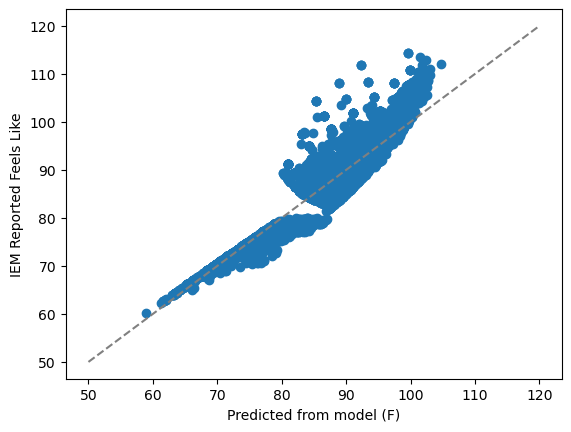

In [43]:
plt.scatter(predicted_hi, testing_data['feel'])
plt.xlabel("Predicted from model (F)")
plt.ylabel("IEM Reported Feels Like")
#plt.xlim(50, 120)
#plt.ylim(50, 120)
plt.plot([50, 120], [50, 120], color='grey', ls='--')

In [44]:
model.dummy_ = "dummy"
model._estimator_type = "regressor"

In [45]:
X_test = testing_data[['tmpf', 'relh']].values
y_test = testing_data['feel'].values
model.evaluate(X_test, y_test)

239/239 [==============================] - 1s 3ms/step - loss: 9.8415


9.841498374938965

In [46]:
# Code adapted from stackoverflow https://stackoverflow.com/questions/77258642/feature-importance-keras-regressionmodel
X_test = testing_data[['tmpf', 'relh']].values
y_test = testing_data['feel'].values
test_loss = model.evaluate(X_test, y_test)

n_permutations = 10  # Number of permutations to perform
feature_importances = np.zeros(X_test.shape[1])

for feature_index in range(len(feature_importances)):
    print('Running permutations for feature:', feature_index)
    for _ in range(n_permutations):
        shuffled_X_test = X_test.copy()
        
        #Shuffle the current feature
        #Keep other features the same
        np.random.shuffle(shuffled_X_test[:, feature_index])
        shuffled_loss = model.evaluate(shuffled_X_test, y_test, verbose=0)
        importance =  shuffled_loss - test_loss 
        feature_importances[feature_index] += importance
    #Average all the permutation tests for the current feature
    feature_importances[feature_index] /= n_permutations

# Print feature importances
print("Feature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"Variable {i+1}: {importance:.4f}")


239/239 [==============================] - 1s 3ms/step - loss: 9.8415
Running permutations for feature: 0
Running permutations for feature: 1
Feature Importances:
Variable 1: 150.8221
Variable 2: 9.7728
